# Imports

In [1]:
import numpy as np
import scipy.optimize as so

On récupére :
- le module `numpy` (*numerical python*) permettant la gestion de grand tableaux de nombres de manière efficace
- le module `scipy.optimize` pour les fonctions d'optimisation


# Comment résoudre une équation non-linéaire

In [10]:
def fonction(x):
    return x**3+x**2-x-1

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(12,9))

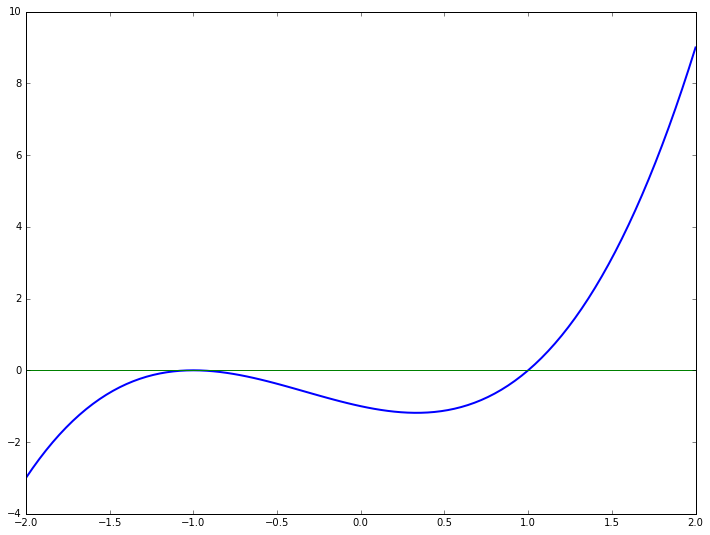

In [21]:
x=np.linspace(-2.0, 2.0, 101)
plt.plot(x, fonction(x), lw=2)
plt.plot(x, np.zeros_like(x), ls='-')

In [11]:
so.fsolve(func=fonction, x0=np.array([0]))

array([-1.])

In [31]:
sources=np.linspace(-20, 20, 10)
for ini in sources:
    print( "{:.3}".format(ini), " -> ", so.fsolve(func=fonction, x0=ini))

-20.0  ->  [-1.]
-15.6  ->  [-1.]
-11.1  ->  [-1.]
-6.67  ->  [-1.]
-2.22  ->  [-1.]
2.22  ->  [ 1.]
6.67  ->  [ 1.]
11.1  ->  [ 1.]
15.6  ->  [ 1.]
20.0  ->  [ 1.]


**On peut obtenir des renseignements sur le calcul effectué**

In [22]:
so.fsolve(func=fonction, x0=5.0, full_output=True)

(array([ 1.]),
 {'fjac': array([[-1.]]),
  'fvec': array([ 0.]),
  'nfev': 14,
  'qtf': array([ -5.16919840e-13]),
  'r': array([-4.00000007])},
 1,
 'The solution converged.')

# Comment minimiser une fonction à valeur scalaire

In [23]:
n=10
a=np.random.random(n)

def cout(X):
    return np.power(X-a, 2).sum()

In [24]:
resultat = so.minimize(fun=cout, x0=np.ones(n))
print(type(resultat))

<class 'scipy.optimize.optimize.OptimizeResult'>


In [25]:
print(resultat.keys())

dict_keys(['status', 'fun', 'nfev', 'jac', 'hess_inv', 'nit', 'x', 'message', 'njev', 'success'])


In [26]:
print(resultat)

   status: 0
      fun: 1.6831862387548031e-15
     nfev: 36
      jac: array([ -8.54965898e-09,  -2.35472077e-08,   1.39109491e-08,
         2.74685867e-08,   4.47166355e-08,   5.11203768e-09,
         4.46845105e-08,  -2.85118757e-08,   4.23992468e-08,
         9.16248744e-09])
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      nit: 1
        x: array([ 0.77775863,  0.98993473,  0.42319764,  0.11440619,  0.19774126,
        0.7970609 ,  0.36896284,  0.97830504,  0.60902035,  0.47423539])
  message: 'Optimization terminated successfully.'
     njev: 3
  success: True


In [27]:
print(np.linalg.norm(resultat.x-a))

4.10266527852e-08


In [29]:
print(resultat.fun-cout(resultat.x))

0.0


**A noter qu'il y a en fait plusieurs solveurs différents disponibles et qu'on peut prescrire en utilisant le paramètre** `method` **de  la fonction** `minimize`.

# Comment trouver un minimum global

**On a quelques algorithmes stochastiques disponibles**

In [51]:
def aMinimiser(x):
    """Fonction de Rastrigin avec beaucoup de minima locaux"""
    return 10*len(x)+np.sum(x**2, axis=x.ndim-1)-10*np.sum(np.cos(2*np.pi*x),axis=x.ndim-1)

In [52]:
x, y=np.linspace(-5,5, 401), np.linspace(-5,5, 401)
X, Y = np.meshgrid(x, y)
valeurs = aMinimiser(np.dstack((X, Y)))

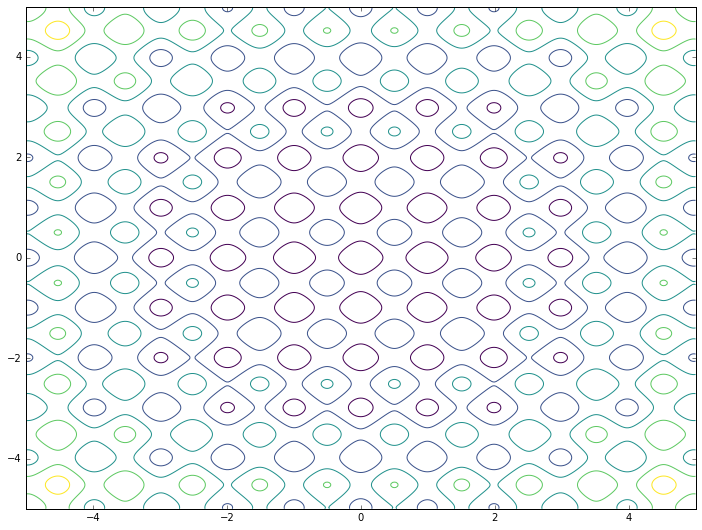

In [53]:
plt.contour(X, Y, valeurs, cmap="viridis")

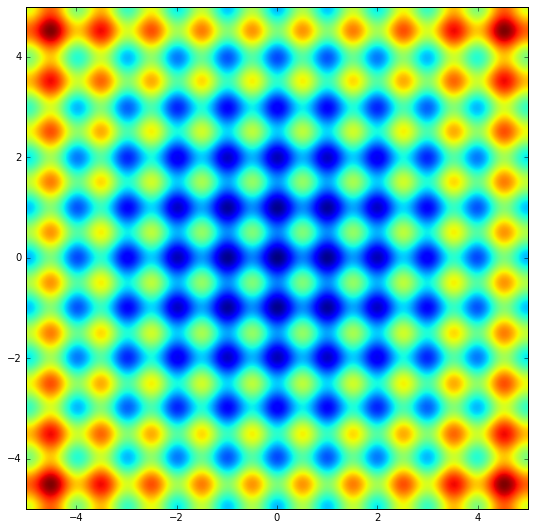

In [54]:
plt.imshow(valeurs, extent=[-5,5,-5,5])

In [58]:
sources= 10*(np.random.random(size=(10,2))-0.5*np.ones((10,2)))
print(sources)

[[-4.55124532  2.53625112]
 [-0.06753866 -1.04362207]
 [ 3.07189529 -1.06947184]
 [ 4.68289346  1.82745659]
 [-1.23685949 -0.75013687]
 [ 1.91760265  0.40598002]
 [-3.45318298  0.58630512]
 [-2.34926475 -0.67963214]
 [ 1.49524402 -0.76257574]
 [-3.48999158  2.9391348 ]]


**Mise en échec des solveurs classiques**

In [68]:
for test in sources:
    temp=so.minimize(fun=aMinimiser, x0=test)
    print("départ en :",test, "\n   minimisation annoncée réussie : ", temp.success, "\n   arrivée : ", temp.x,
         "\n   VALEUR DE LA FONCTION : {:.4} \n".format(temp.fun))

départ en : [-4.55124532  2.53625112] 
   minimisation annoncée réussie :  True 
   arrivée :  [-5.96957278  3.97978384] 
   VALEUR DE LA FONCTION : 51.74 

départ en : [-0.06753866 -1.04362207] 
   minimisation annoncée réussie :  True 
   arrivée :  [ -8.87983913e-09  -9.94958644e-01] 
   VALEUR DE LA FONCTION : 0.995 

départ en : [ 3.07189529 -1.06947184] 
   minimisation annoncée réussie :  True 
   arrivée :  [ 2.98485569 -0.99495864] 
   VALEUR DE LA FONCTION : 9.95 

départ en : [ 4.68289346  1.82745659] 
   minimisation annoncée réussie :  True 
   arrivée :  [ 4.97469139  1.98991223] 
   VALEUR DE LA FONCTION : 28.85 

départ en : [-1.23685949 -0.75013687] 
   minimisation annoncée réussie :  True 
   arrivée :  [ -6.72021567e-09  -1.98991224e+00] 
   VALEUR DE LA FONCTION : 3.98 

départ en : [ 1.91760265  0.40598002] 
   minimisation annoncée réussie :  True 
   arrivée :  [  1.98991223e+00  -2.26828639e-08] 
   VALEUR DE LA FONCTION : 3.98 

départ en : [-3.45318298  0.586

In [71]:
for test in sources:
    temp=so.basinhopping(func=aMinimiser, x0=test)
    print("départ en :",test, "\n   arrivée : ", temp.x,
         "\n   VALEUR DE LA FONCTION : {:.4} \n".format(temp.fun))

départ en : [-4.55124532  2.53625112] 
   arrivée :  [ -3.91994157e-09  -4.32021113e-09] 
   VALEUR DE LA FONCTION : 7.105e-15 

départ en : [-0.06753866 -1.04362207] 
   arrivée :  [ -7.39350137e-09  -6.14790406e-09] 
   VALEUR DE LA FONCTION : 1.776e-14 

départ en : [ 3.07189529 -1.06947184] 
   arrivée :  [ -2.85774095e-09  -8.46970837e-09] 
   VALEUR DE LA FONCTION : 1.421e-14 

départ en : [ 4.68289346  1.82745659] 
   arrivée :  [ -5.83565019e-09  -5.99167128e-09] 
   VALEUR DE LA FONCTION : 1.421e-14 

départ en : [-1.23685949 -0.75013687] 
   arrivée :  [ -3.75334853e-09  -4.01910182e-09] 
   VALEUR DE LA FONCTION : 7.105e-15 

départ en : [ 1.91760265  0.40598002] 
   arrivée :  [ -3.54413643e-09  -6.10890311e-09] 
   VALEUR DE LA FONCTION : 7.105e-15 

départ en : [-3.45318298  0.58630512] 
   arrivée :  [ -1.10061740e-09   5.26499172e-09] 
   VALEUR DE LA FONCTION : 3.553e-15 

départ en : [-2.34926475 -0.67963214] 
   arrivée :  [ -6.64044740e-09  -5.96646601e-09] 
   VALE

In [74]:
so.differential_evolution(func=aMinimiser, bounds=[(-5.0,5.0),(-5.0,5.0)])

 message: 'Optimization terminated successfully.'
     fun: 0.99495905709331467
     jac: array([ -3.55271368e-07,  -1.77635684e-06])
 success: True
    nfev: 702
     nit: 22
       x: array([ -5.70868589e-09,  -9.94958647e-01])